In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


In [4]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Load and Explore Data ---

# Load the dataset using the CORRECT Kaggle path (lowercase 'kaggle')
df = pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv')

# 1. See the first 5 rows
print("--- FIRST 5 ROWS ---")
print(df.head())

# 2. Get a summary of the data
print("\n--- DATA INFO ---")
df.info()

# 3. Check for any missing values
print("\n--- MISSING VALUES ---")
print(df.isnull().sum())

# 4. See the distribution of different crops
print("\n--- CROP COUNTS ---")
print(df['label'].value_counts())

# --- Step 2: Prepare the Data ---

# Import the function for splitting data
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('label', axis=1) # All columns except 'label'
y = df['label']              # Only the 'label' column

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- DATA SHAPES AFTER SPLITTING ---")
print("Shape of training features (X_train):", X_train.shape)
print("Shape of testing features (X_test):", X_test.shape)

# --- Step 3: Train the Random Forest Model ---

# Import the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("\n--- MODEL TRAINING COMPLETE ---")

# --- Step 4: Evaluate the Model ---

# Import tools for evaluation
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate and print the model's accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Print a detailed classification report
print("\n--- CLASSIFICATION REPORT ---")
print(classification_report(y_test, predictions))

--- FIRST 5 ROWS ---
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

--- DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1

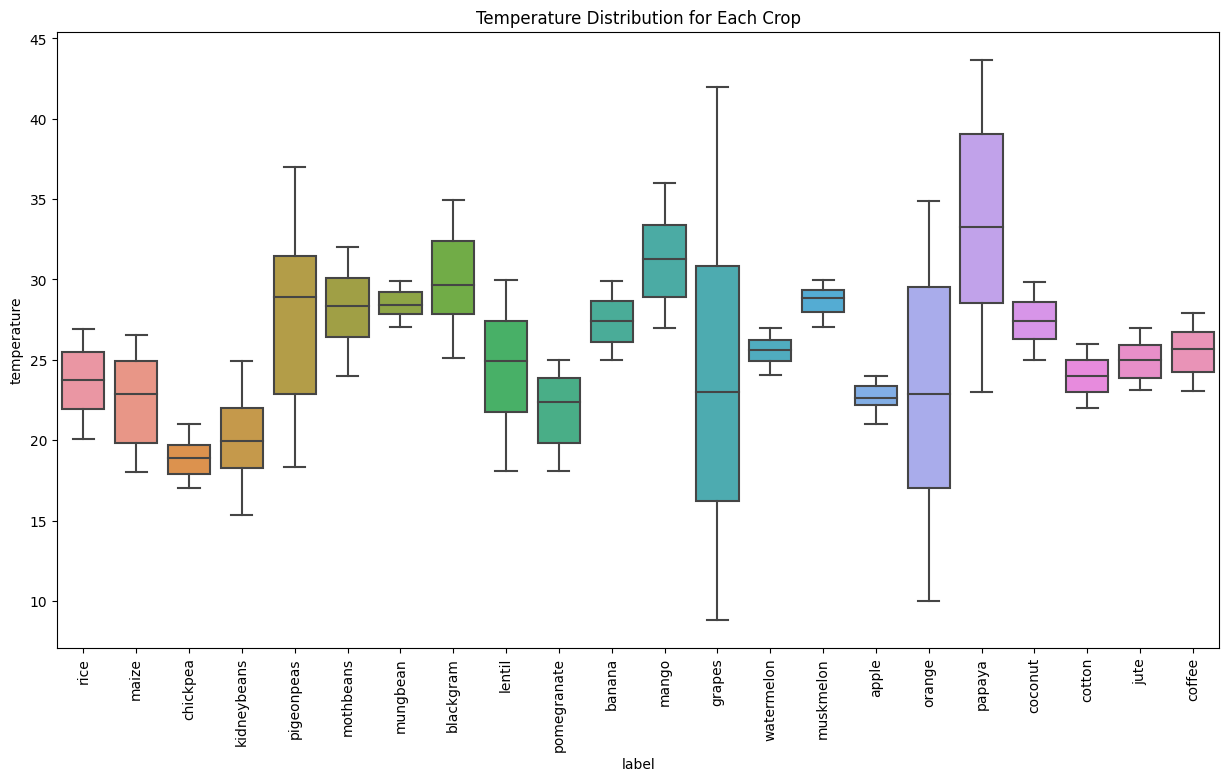

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger figure size for better readability
plt.figure(figsize=(15, 8))

# Create a box plot to show the distribution of temperature for each crop
sns.boxplot(x='label', y='temperature', data=df)

# Rotate the x-axis labels to prevent them from overlapping
plt.xticks(rotation=90)

# Add a title to the graph
plt.title('Temperature Distribution for Each Crop')

# Show the plot
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

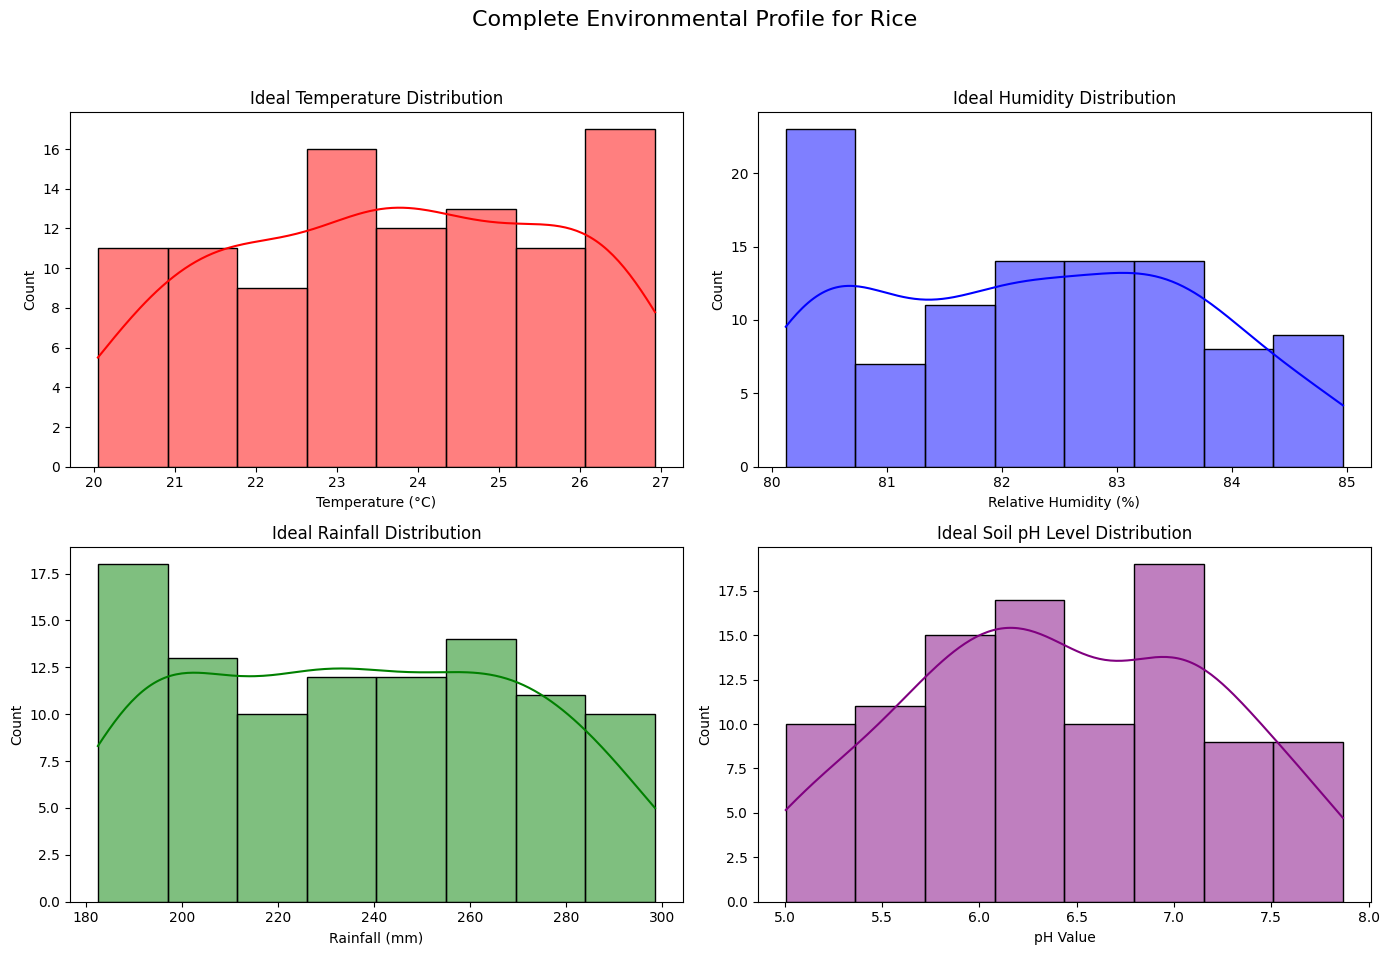

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to only include data for 'rice'
rice_df = df[df['label'] == 'rice']

# Create a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Add a main title for the entire figure
fig.suptitle('Complete Environmental Profile for Rice', fontsize=16)

# Plot Temperature Distribution
sns.histplot(rice_df['temperature'], kde=True, ax=axs[0, 0], color='red')
axs[0, 0].set_title('Ideal Temperature Distribution')
axs[0, 0].set_xlabel('Temperature (°C)')

# Plot Humidity Distribution
sns.histplot(rice_df['humidity'], kde=True, ax=axs[0, 1], color='blue')
axs[0, 1].set_title('Ideal Humidity Distribution')
axs[0, 1].set_xlabel('Relative Humidity (%)')

# Plot Rainfall Distribution
sns.histplot(rice_df['rainfall'], kde=True, ax=axs[1, 0], color='green')
axs[1, 0].set_title('Ideal Rainfall Distribution')
axs[1, 0].set_xlabel('Rainfall (mm)')

# Plot pH Level Distribution
sns.histplot(rice_df['ph'], kde=True, ax=axs[1, 1], color='purple')
axs[1, 1].set_title('Ideal Soil pH Level Distribution')
axs[1, 1].set_xlabel('pH Value')

# Adjust layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()